###### Exploration Notebook

The goal of this notebook is to understand the features and their relationships with the target variable which is going to be 'Sales'. This will also include data cleaning and processing. 

We will start by loading and inspecting the data, performing the regular checks, and visualizing the distributions of the features. 
Then, we will perform some exploratory data analysis to gain insights of the correlations between the features and the target variable. 
This part may include pre-processing. Finally, we will summarize our findings and identify any interesting patterns or trends in the data that could inform our modeling approach. 

The dataset consists of 180519 instances and 53 columns that are mapped below to its descriptions.

### **TL;DR**

### In this notebook, you may find:
* Exploration of variables 
* Distributions of variables
* Relationships between variables
* Processing of variables

**Type**: Type of transaction made

**Days for shipping (real)**: Actual shipping days of the purchased product

**Days for shipment (scheduled)**: Days of scheduled delivery of the purchased product

**Benefit per order**: Earnings per order placed

**Sales per customer**: Total sales per customer made per customer

**Delivery Status**: Delivery status of orders: Advance shipping, Late delivery, Shipping canceled, Shipping on time

**Late_delivery_risk**: Categorical variable that indicates if sending is late (1), it is not late (0).

**Category Id**: Product category code

**Category Name**: Description of the product category

**Customer City**: City where the customer made the purchase

**Customer Country**: Country where the customer made the purchase

**Customer Email**: Customer's email

**Customer Fname**: Customer name

**Customer Id**: Customer ID

**Customer Lname**: Customer lastname

**Customer Password**: Masked customer key

**Customer Segment**: Types of Customers: Consumer, Corporate, Home Office

**Customer State**: State to which the store where the purchase is registered belongs

**Customer Street**: Street to which the store where the purchase is registered belongs

**Customer Zipcode**: Customer Zipcode

**Department Id**: Department code of store

**Department Name**: Department name of store

**Latitude**: Latitude corresponding to location of store

**Longitude**: Longitude corresponding to location of store

**Market**: Market to where the order is delivered: Africa, Europe, LATAM, Pacific Asia, USCA

**Order City**: Destination city of the order

**Order Country**: Destination country of the order

**Order Customer Id**: Customer order code

**order date (DateOrders)**: Date on which the order is made

**Order Id**: Order code

**Order Item Cardprod Id**: Product code generated through the RFID reader

**Order Item Discount**: Order item discount value

**Order Item Discount Rate**: Order item discount percentage

**Order Item Id**: Order item code

**Order Item Product Price**: Price of products without discount

**Order Item Profit Ratio**: Order Item Profit Ratio

**Order Item Quantity**: Number of products per order

**Sales**: Value in sales

**Order Item Total**: Total amount per order

**Order Profit Per Order**: Order Profit Per Order

**Order Region**: Region of the world where the order is delivered: Southeast Asia, South Asia, Oceania, Eastern Asia, West Asia, West of USA, US Center, West Africa, Central Africa, North Africa, Western Europe, Northern, Caribbean, South America, East Africa, Southern Europe, East of USA, Canada, Southern Africa, Central Asia, Europe, Central America, Eastern Europe, South of USA

**Order State**: State of the region where the order is delivered

**Order Status**: Order Status: COMPLETE, PENDING, CLOSED, PENDING_PAYMENT, CANCELED, PROCESSING, SUSPECTED_FRAUD, ON_HOLD, PAYMENT_REVIEW

**Product Card Id**: Product code

**Product Category Id**: Product category code

**Product Description**: Product Description

**Product Image**: Link of visit and purchase of the product

**Product Name**: Product Name

**Product Price**: Product Price

**Product Status**: Status of the product stock: If it is 1 not available, 0 the product is available

**Shipping date (DateOrders)**: Exact date and time of shipment

**Shipping Mode**: The following shipping modes are presented: Standard Class, First Class, Second Class, Same Day

In [534]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [494]:
# Get the file path from an environment variable
file_path = os.environ.get("CSV_FILE_PATH")

if file_path:
    supply_chain_data = pd.read_csv(file_path)
else:
    file_path = input("Enter the CSV file path: ")
    supply_chain_data = pd.read_csv(file_path, encoding='iso-8859-1')

Enter the CSV file path: /Users/konstantinostsoum/Downloads/supply-chain-datasets/DataCoSupplyChainDataset.csv


In [495]:
def customized_plot(title, x_label, y_label, x_rotation=None):
    """
    This function creates a customized plot with specified title, labels, and optional x-axis label rotation.

    Args:
    - title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    - x_rotation (int, optional): The rotation angle for x-axis labels (degrees).

    Returns:
    - fig (matplotlib.figure.Figure): The figure object for the plot.
    - ax (matplotlib.axes._subplots.AxesSubplot): The axes object for the plot.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    if x_rotation:
        ax.tick_params(axis='x', labelrotation=x_rotation)
    return fig, ax

### Gathering information

In [496]:
# Get a first glance of the dataset
supply_chain_data.shape

(180519, 53)

In [497]:
supply_chain_data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [498]:
# Columns and data types
supply_chain_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [499]:
# Concatenate customer's Full name
supply_chain_data['Customer Full Name'] = supply_chain_data['Customer Fname'].astype(str)+supply_chain_data['Customer Lname'].astype(str)
# Remove irrelevant features
supply_chain_data=supply_chain_data.drop(['Customer Full Name', 'Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
supply_chain_data.shape

(180519, 43)

In [500]:
# Missing values check
supply_chain_data.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id       

Surprisingly, there are 3 (I guess random) missing values in the "Customer Zipcode" column. 


Since this refers to a zipcode, I'll try to search in what country, city, state these customers belong to as well as trying to find the zipcode using coordinates.  

In [501]:
# Show rows that contain missing values ("Customer Zipcode" column)
supply_chain_data[supply_chain_data['Customer Zipcode'].isna()][["Customer City", "Customer Country", "Customer Segment", "Customer State", "Latitude", "Longitude"]]

,Customer City,Customer Country,Customer Segment,Customer State,Latitude,Longitude
35704,CA,EE. UU.,Consumer,95758,39.134159,-123.718552
46440,CA,EE. UU.,Corporate,95758,38.408573,-121.449112
82511,CA,EE. UU.,Consumer,91732,34.071892,-118.013886


In [502]:
# Define the rows and values for imputation
rows_to_impute = [35704, 46440, 82511]
imputed_zipcode_values = [5801, 95758, 12014] 

# Impute values
for row_idx, value in zip(rows_to_impute, imputed_zipcode_values):
    supply_chain_data.at[row_idx, "Customer Zipcode"] = value
    
# Remove Latitude and Longitude as we do not need them anymore
supply_chain_data=supply_chain_data.drop(["Latitude", "Longitude"], axis =1)

In [503]:
# Transposed the dataframe due to the amount of columns we got
supply_chain_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.00000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.00000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.49000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.00000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.00000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180519.0,35921.159097,37542.522425,603.00000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.00000,4.000000,5.000000,7.000000,12.000000
Order Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000


### Exploratory Data Analysis

Since we have 42 columns, it would be amazing to visualize them all (both separately and not). 

However, we have to be strategic to avoid getting lost in the details. 

In the end, we can always create a visual later if something sparks our interest or we may tailor made the dataset for different purposes.

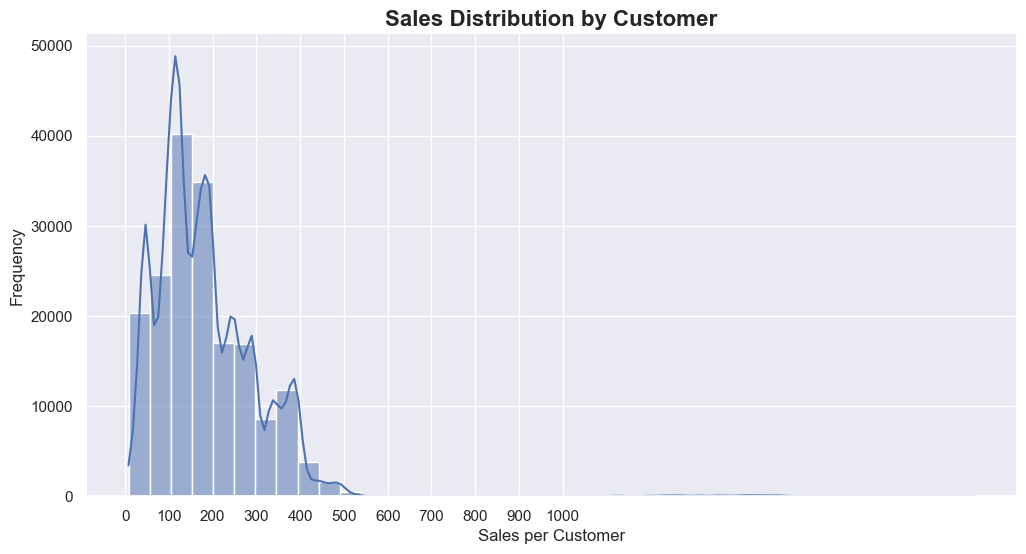

In [504]:
fig, ax = customized_plot('Sales Distribution by Customer', 'Sales per Customer', 'Frequency')
sns.histplot(supply_chain_data['Sales per customer'], bins=40, kde=True, ax=ax)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

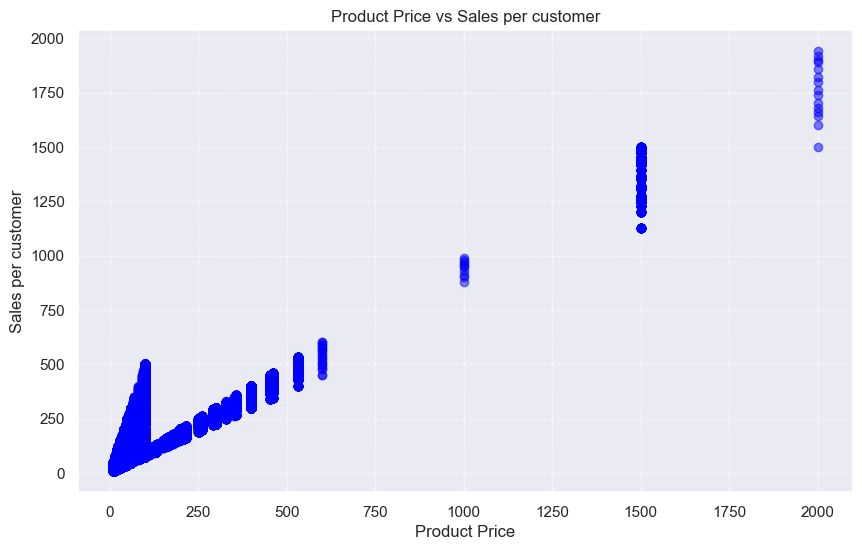

In [505]:
plt.figure(figsize=(10, 6))
plt.scatter(supply_chain_data['Product Price'], supply_chain_data['Sales per customer'], c='blue', alpha=0.5)
plt.title('Product Price vs Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

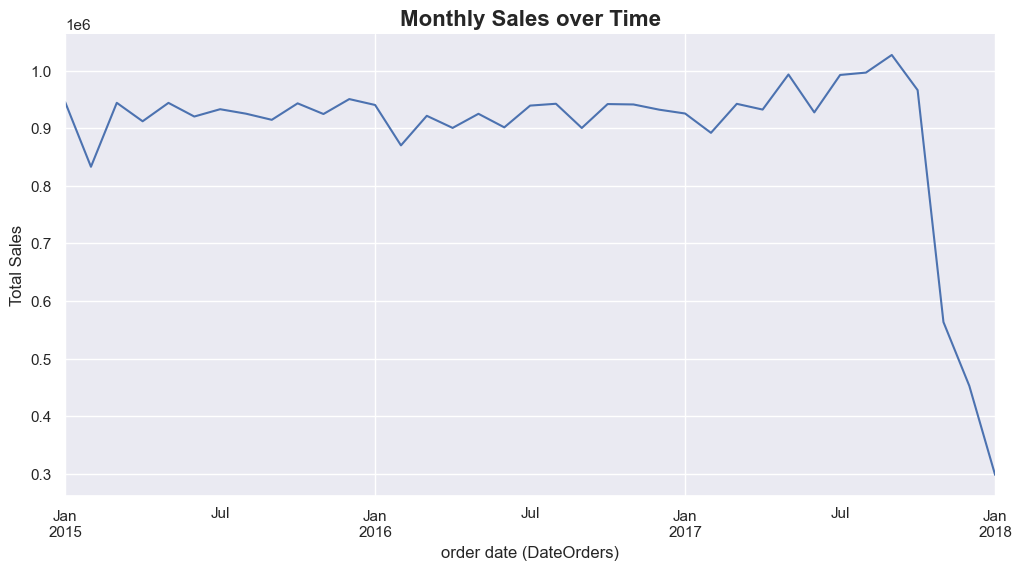

In [506]:
supply_chain_data['order date (DateOrders)'] = pd.to_datetime(supply_chain_data['order date (DateOrders)'])
supply_chain_data.set_index('order date (DateOrders)', inplace=True)
monthly_sales = supply_chain_data['Sales per customer'].resample('M').sum()
fig, ax = customized_plot('Monthly Sales over Time', 'Date', 'Total Sales')
monthly_sales.plot(ax=ax)
plt.show()

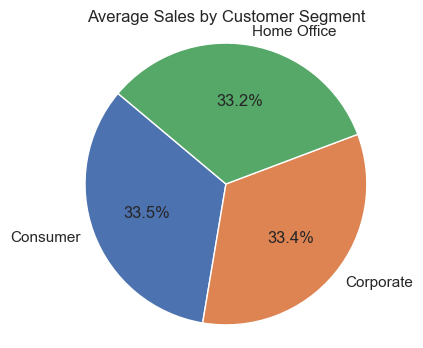

In [507]:
average_sales_by_segment = supply_chain_data.groupby('Customer Segment')['Sales per customer'].mean().reset_index()
plt.figure(figsize=(4, 4))
plt.pie(average_sales_by_segment['Sales per customer'], labels=average_sales_by_segment['Customer Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Average Sales by Customer Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

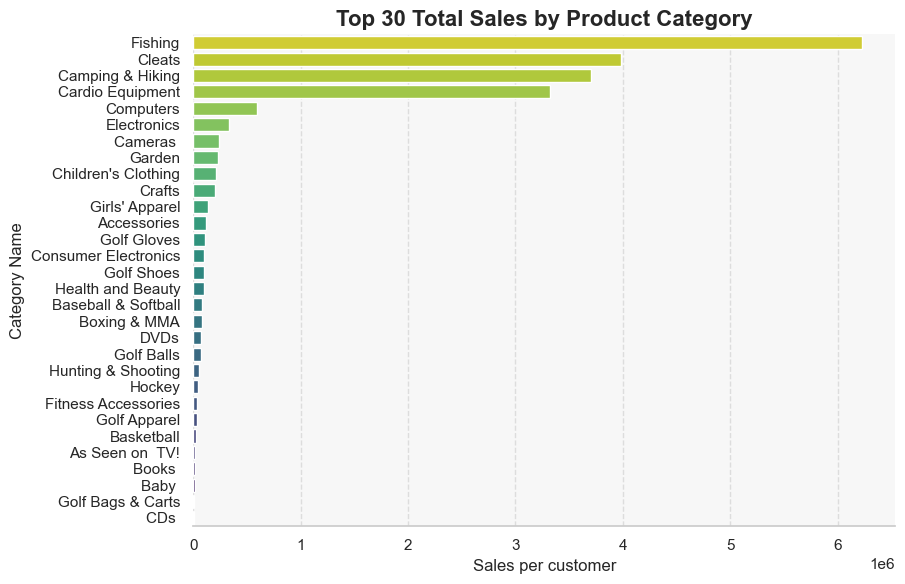

In [508]:
# Calculate total sales for each product category
total_sales_by_category = supply_chain_data.groupby('Category Name')['Sales per customer'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
total_sales_by_category = total_sales_by_category.head(30).sort_values(by='Sales per customer', ascending=True)

sns.set_style("whitegrid")
fig, ax = customized_plot('Top 30 Total Sales by Product Category', 'Total Sales', 'Category Name')
sns.barplot(x='Sales per customer', y='Category Name', data=total_sales_by_category, ax=ax, palette='viridis')
ax.set_facecolor('#f7f7f7')  # Set background color
sns.despine(top=True, right=True, left=True)  # Remove spines
ax.xaxis.grid(True, linestyle='--', alpha=0.6)  # Add vertical grid lines
plt.tight_layout()  # Ensure labels are not cut off
ax.invert_yaxis()
plt.subplots_adjust(left=0.4)
plt.show()

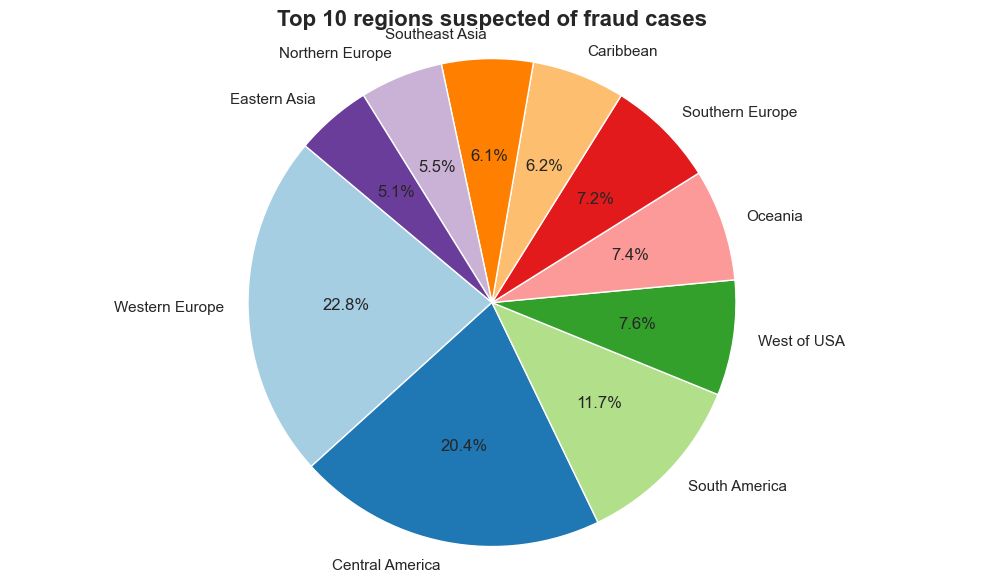

In [509]:
#  Filter the dataset to include suspected fraud orders
suspected_fraud_orders = supply_chain_data[supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD']

# Group the data by Order Region to count suspected fraud cases
fraud_counts = suspected_fraud_orders['Order Region'].value_counts().head(10)

# Create a pie chart to visualize the distribution of suspected fraud cases by region
plt.figure(figsize=(10, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(fraud_counts))))

# Add title
plt.title('Top 10 regions suspected of fraud cases', fontsize=16, fontweight='bold')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

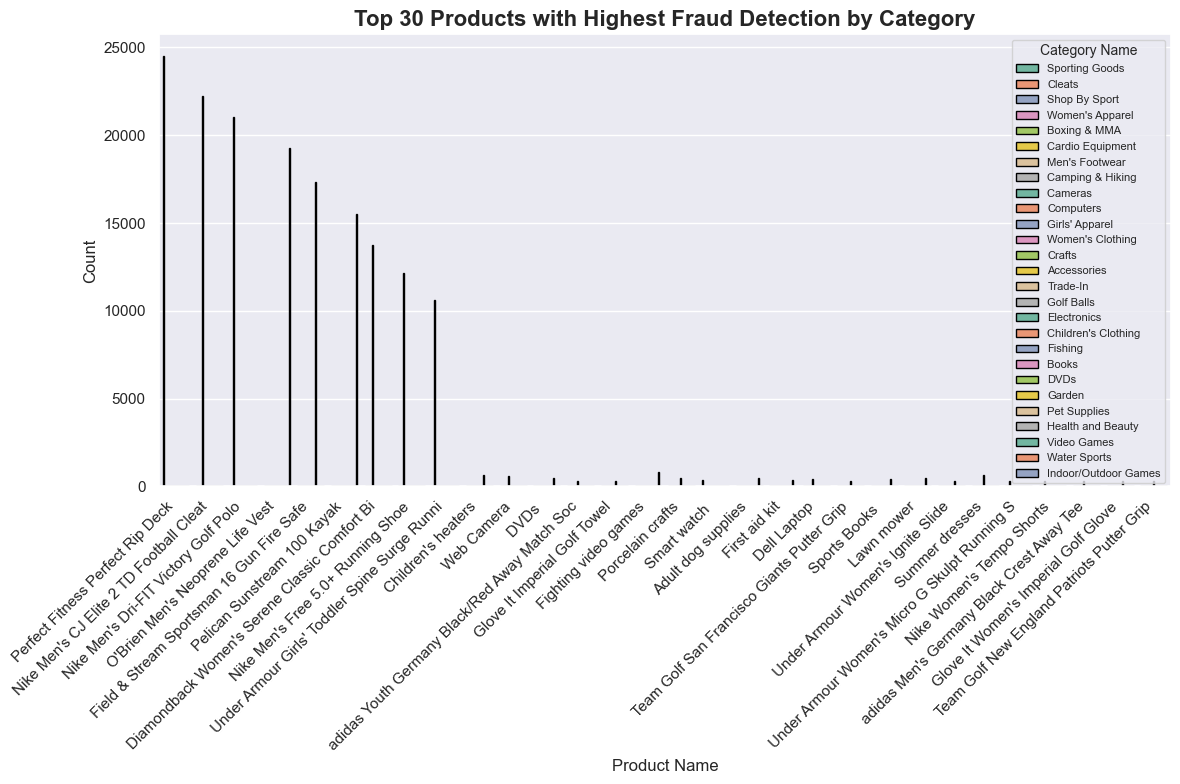

In [510]:

# Filter suspected fraud orders
suspected_fraud_orders = supply_chain_data[supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD']

# Get the top 30 products with the highest fraud detection
top_30_fraud_products = suspected_fraud_orders['Product Name'].value_counts().head(30)

# Keep only the top 30 fraud products
top_30_fraud_product_data = supply_chain_data[supply_chain_data['Product Name'].isin(top_30_fraud_products.index)]

# Create the plot with black lines
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

# Create a countplot for the top 30 fraud products by category
ax = sns.countplot(
    x='Product Name', 
    data=top_30_fraud_product_data, 
    hue='Category Name', 
    order=top_30_fraud_products.index,  # Order by frequency of occurrence
    palette='Set2',
    edgecolor='black',  # Set line color to black
)

# Customize plot labels and title
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 30 Products with Highest Fraud Detection by Category', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Category Name', title_fontsize=10, fontsize=8, loc='upper right')
plt.tight_layout()
plt.show()


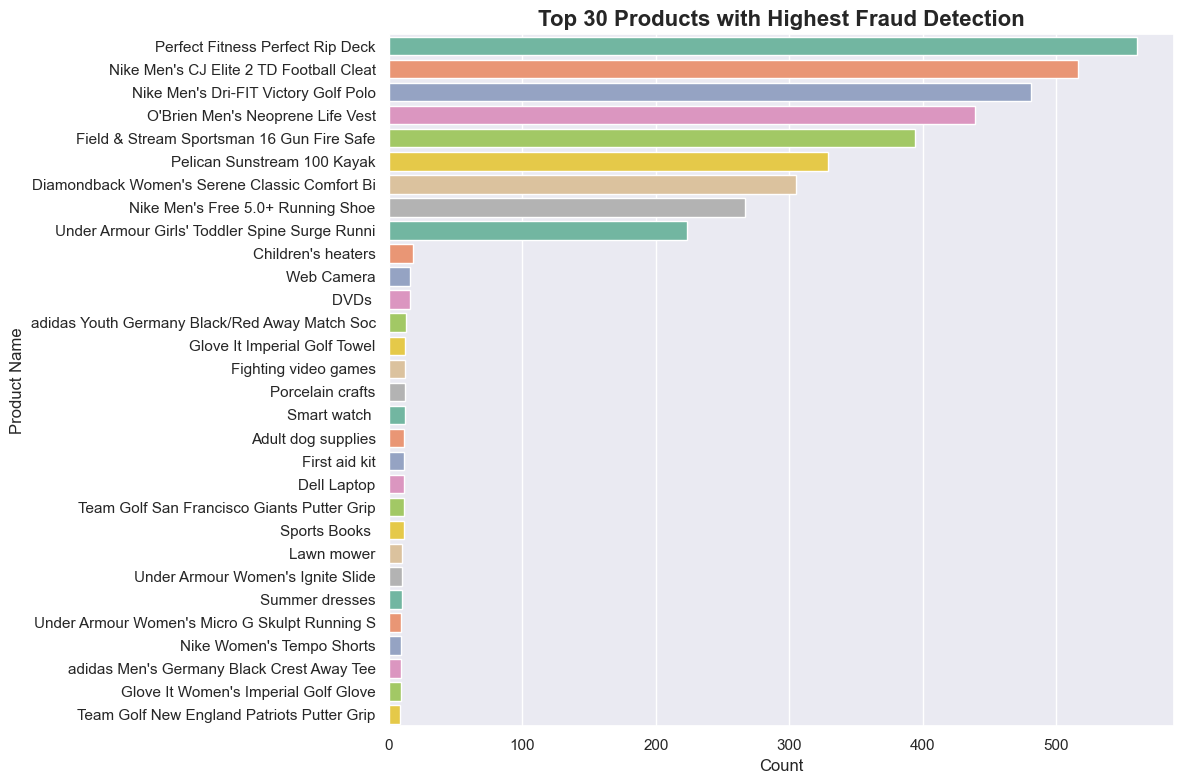

In [511]:
# Filter the dataset to include suspected fraud orders
suspected_fraud_orders = supply_chain_data[supply_chain_data['Order Status'] == 'SUSPECTED_FRAUD']

# Get the top 30 products with the highest fraud detection
top_30_fraud_products = suspected_fraud_orders['Product Name'].value_counts().head(30)

# Create a figure and axis for the horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_30_fraud_products.values, y=top_30_fraud_products.index, palette='Set2')

# Add labels and title
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Product Name', fontsize=12)
ax.set_title('Top 30 Products with Highest Fraud Detection', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

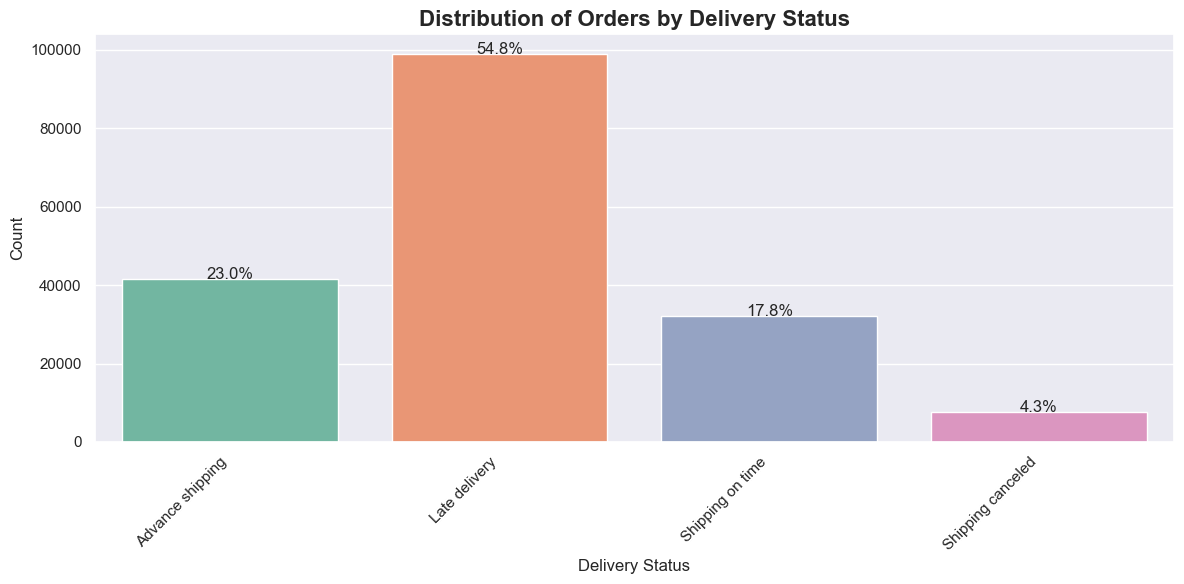

In [512]:
# Create plot and calculate the percentages
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Delivery Status', data=supply_chain_data, palette='Set2')
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Orders by Delivery Status', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
# Calculate and display percentages
total_orders = len(supply_chain_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_orders)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10 
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

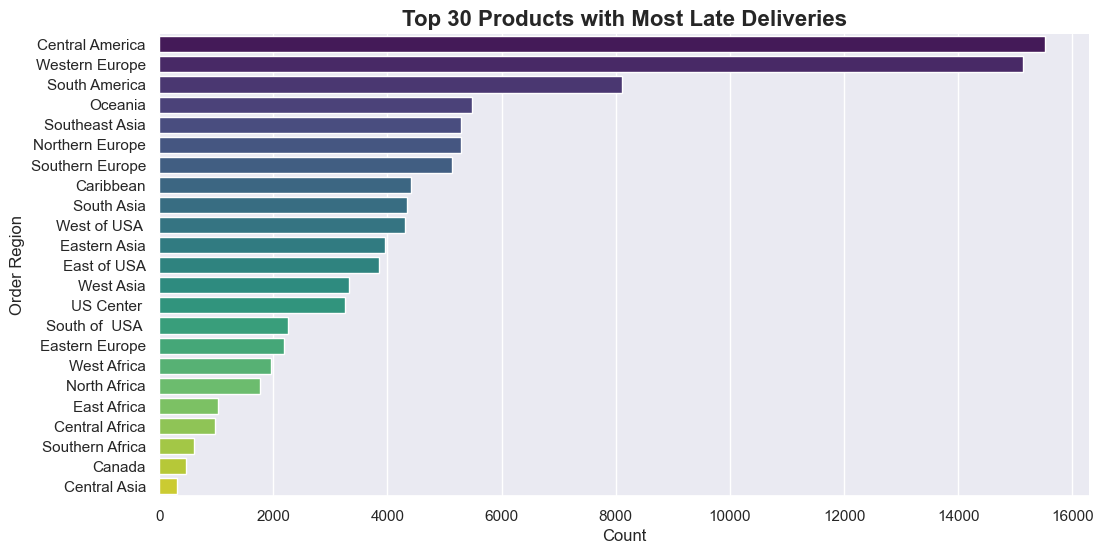

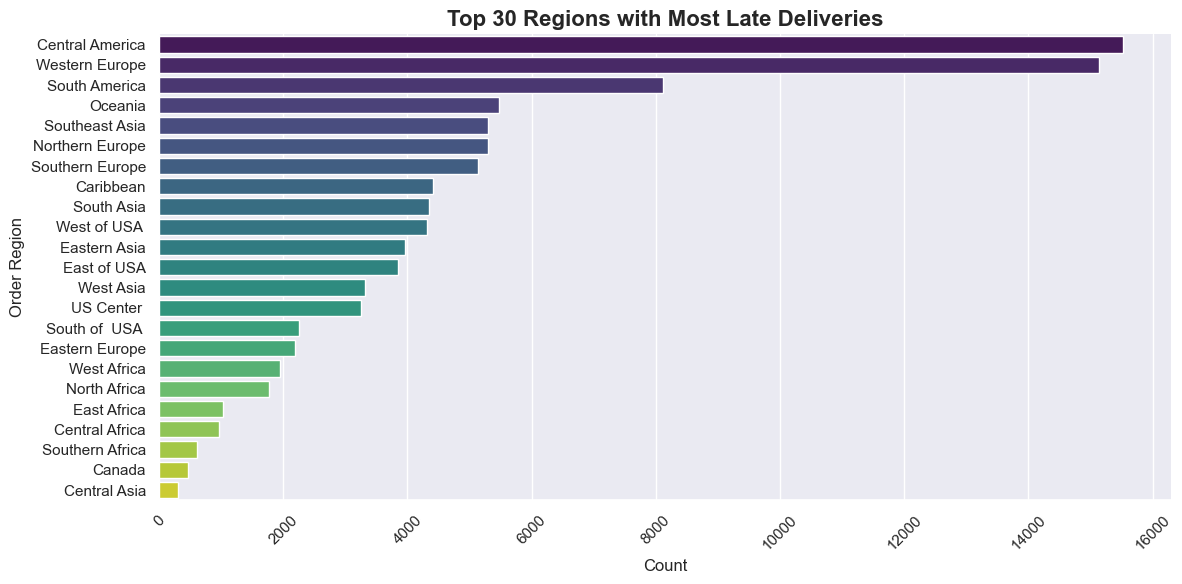

In [513]:
# Filter late deliveries (Late_delivery_risk = 1)
late_deliveries = supply_chain_data[supply_chain_data['Late_delivery_risk'] == 1]

# Get the top 30 products with the most late deliveries
top_30_late_products = late_deliveries['Product Name'].value_counts().head(30)

# Get the top 30 regions with the most late deliveries
top_30_late_regions = late_deliveries['Order Region'].value_counts().head(30)

# Bar plot for top 30 products with most late deliveries
fig, ax = customized_plot('Top 30 Products with Most Late Deliveries', 'Count', 'Product Name', x_rotation=0)
sns.barplot(x=top_30_late_regions.values, y=top_30_late_regions.index, ax=ax, palette='viridis')

# Bar plot for top 30 regions with most late deliveries
fig, ax = customized_plot('Top 30 Regions with Most Late Deliveries', 'Count', 'Order Region', x_rotation=45)
sns.barplot(x=top_30_late_regions.values, y=top_30_late_regions.index, ax=ax, palette='viridis')

plt.tight_layout()
plt.show()

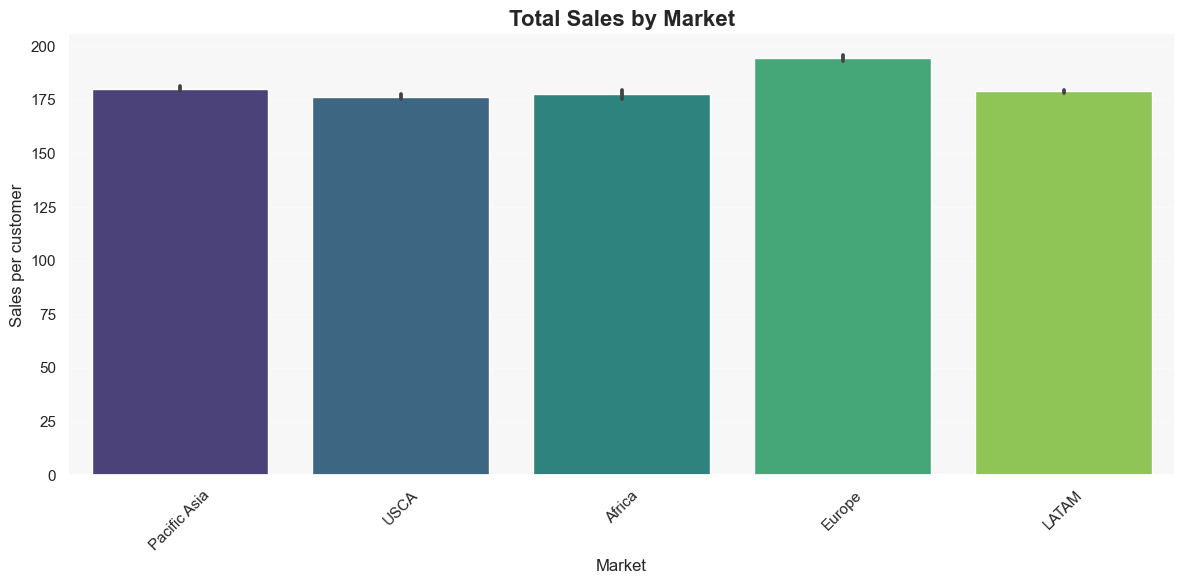

In [514]:
fig, ax = customized_plot('Total Sales by Market', 'Market', 'Total Sales')
sns.barplot(x='Market', y='Sales per customer', data=supply_chain_data, ax=ax, palette='viridis')
ax.set_facecolor('#f7f7f7')  
sns.despine(top=True, right=True, left=True)  
ax.yaxis.grid(True, linestyle='--', alpha=0.6) 
plt.xticks(rotation=45)
plt.tight_layout()  # ensure labels are not cut off
plt.show()

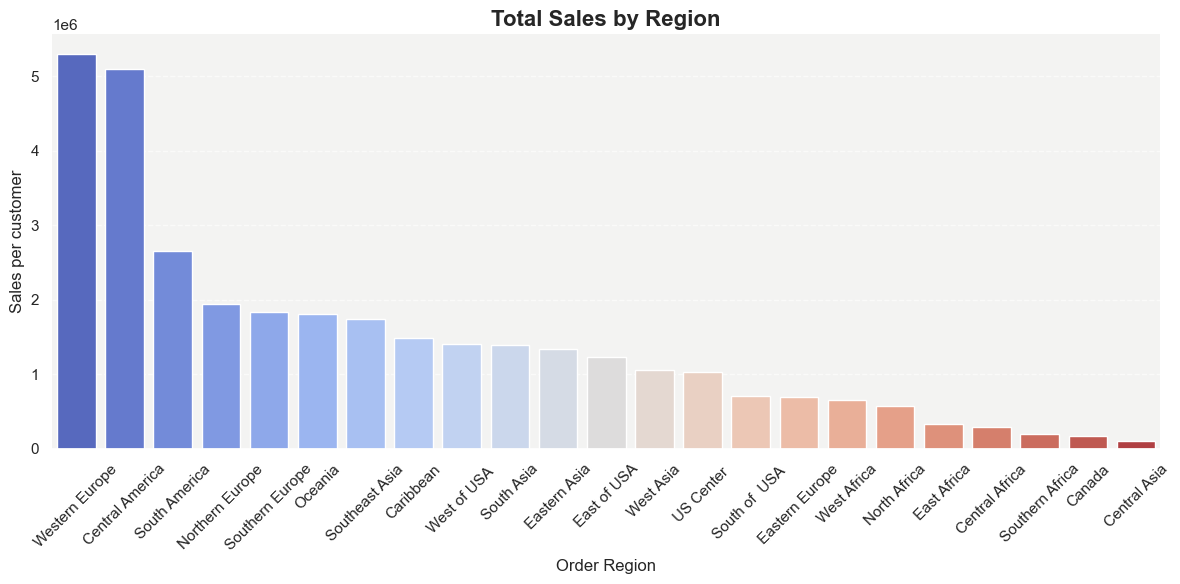

In [515]:
total_sales_by_region = supply_chain_data.groupby('Order Region')['Sales per customer'].sum().reset_index()

sales_by_region_sorted = total_sales_by_region.sort_values(by='Sales per customer', ascending=False)
fig, ax = customized_plot('Total Sales by Region', 'Order Region', 'Total Sales')
sns.barplot(x='Order Region', y='Sales per customer', data=sales_by_region_sorted, ax=ax, palette='coolwarm')
ax.set_facecolor('#f3f3f2')  
sns.despine(top=True, right=True, left=True)  
ax.yaxis.grid(True, linestyle='--', alpha=0.6) 
plt.xticks(rotation=45)
plt.tight_layout()  # ensure labels are not cut off
plt.show()

# Findings:

*  The distribution of sales by customer is right skewed. Most of the sale value are centered around 100-150 units. This field represents the total sales generated by each individual customer. <br /> <br />

* Prices have a linear relationship with sales. There have been fluctuations over the years, but sales suddenly started to dip at the beginning of 2018. <br /> <br />

* The 'Consumer' category slightly dominates as the largest segment, while the 'Corporate' and 'Home Office' segments are nearly equal in size. <br /> <br />

* The top selling product categories are fishing, cleats followed by camping & hiking. On the contrary, the top categories with the highest fraud detection were sporting goods followed by cleats and shop by sport. The top products with the highest fraud detection however, seem to be the ‘Perfect Fitness Perfect Rip Deck’, the ‘Nike Men’s CJ Elite 2 TD football Cleat’ and the ‘Nike Men’s Dry-FIT Victory Golf Polo’. Surprisingly, almost half of the total fraudulent cases happened in Western Europe (almost 22.8%) and Central America (20.4%).  <br /> <br />

* By a substantial degree, most of the deliveries were delivered late to the customers. Specifically, more than half of the total orders were considered to be delivered late. Most, if not all, of the top selling products were delivered late. The most late deliveries happened in Central America and then in Western Europe. <br /> <br />

* The biggest selling market is found to be Europe and then Pacific Asia along with Latin America (LATAM). Region-wise, the throne belongs to Western Europe closely followed by Central America. Central Asia has the lowest sales per region. This is very interesting in conjunction to the point above. <br /> <br />

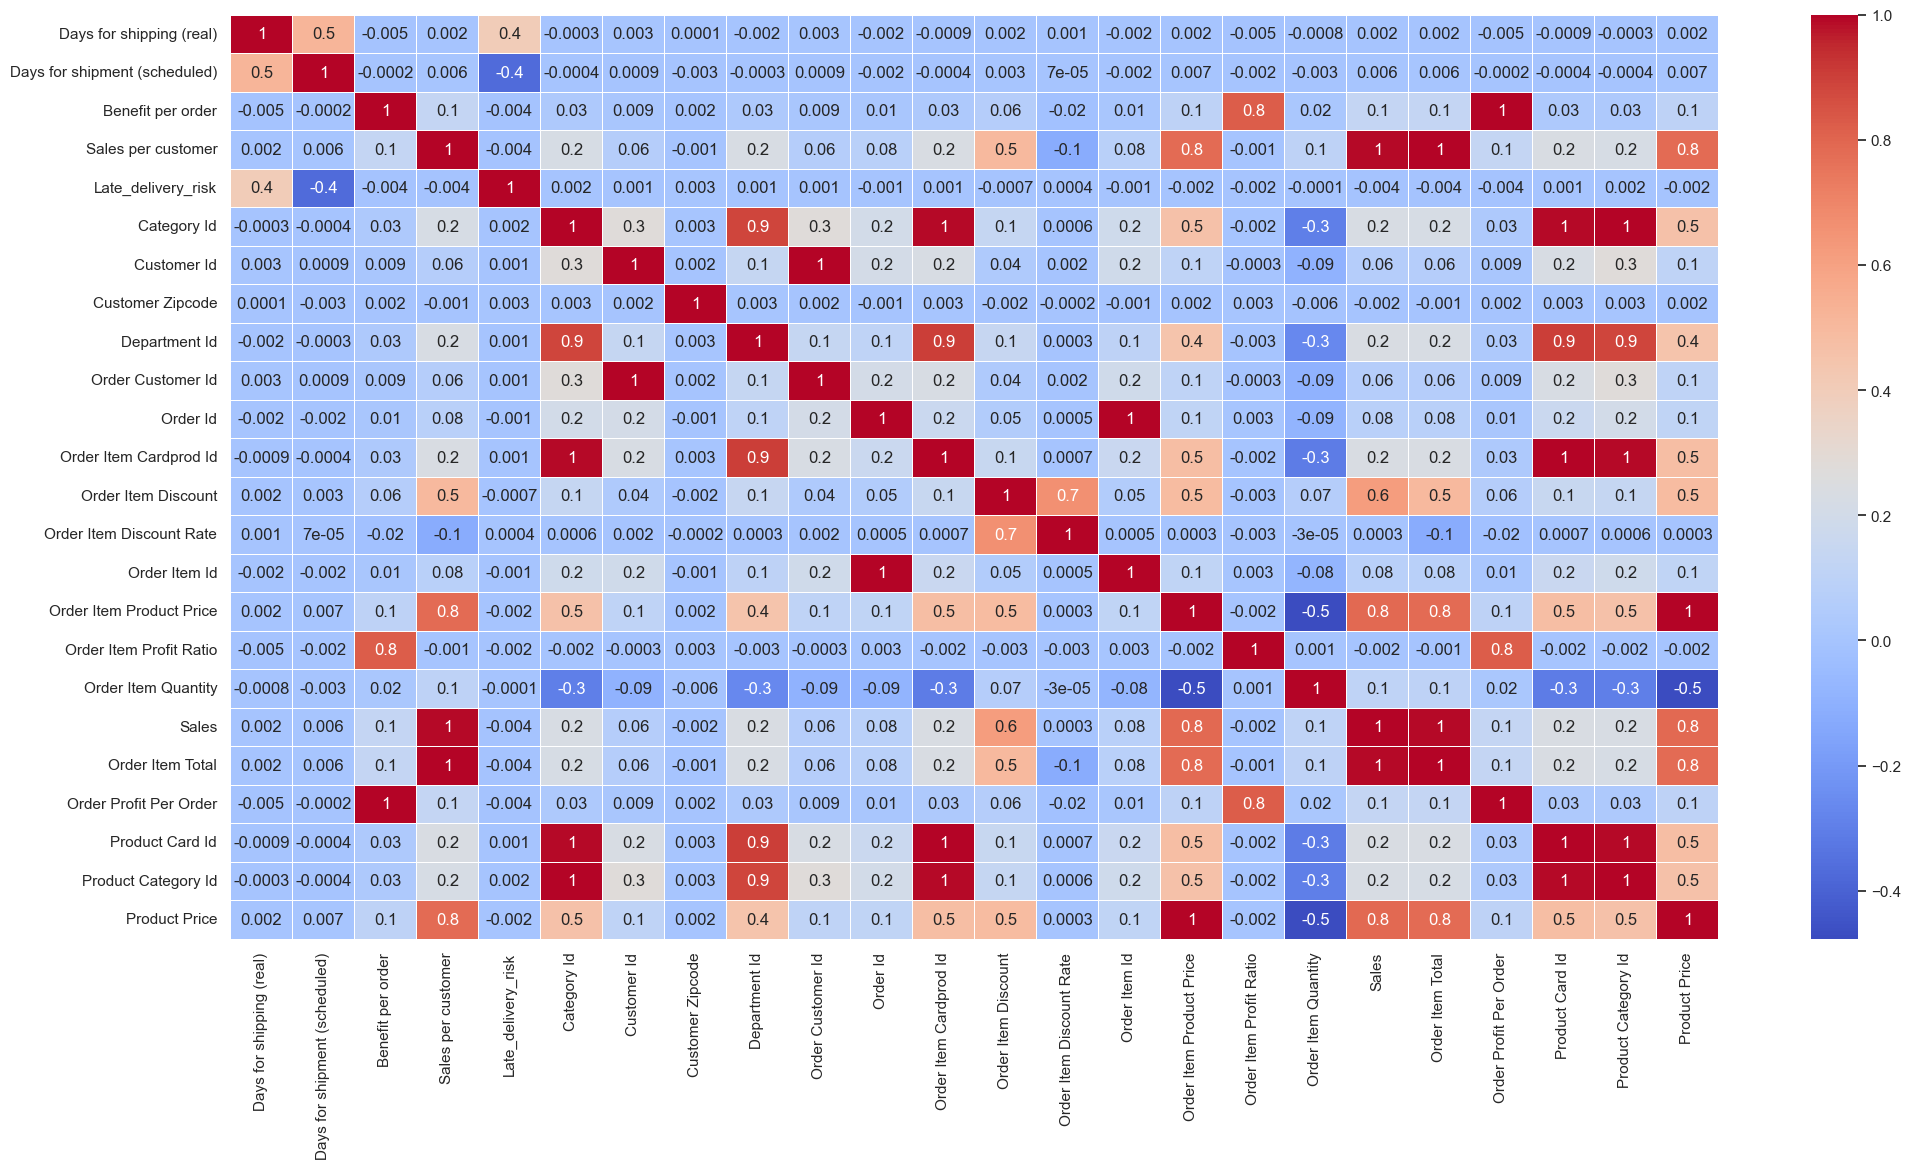

In [516]:
# Keeping only numeric columns
numeric_columns = supply_chain_data.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize=(24, 12))
sns.heatmap(numeric_columns.corr(), annot=True, linewidths=0.5, fmt='.1g', cmap='coolwarm')
plt.show()

That's too many values we have here. Let's see the most correlated features (taking 0.7 as a threshold).

We don't have highly negative correlation. Highly correlated features will be ommited.

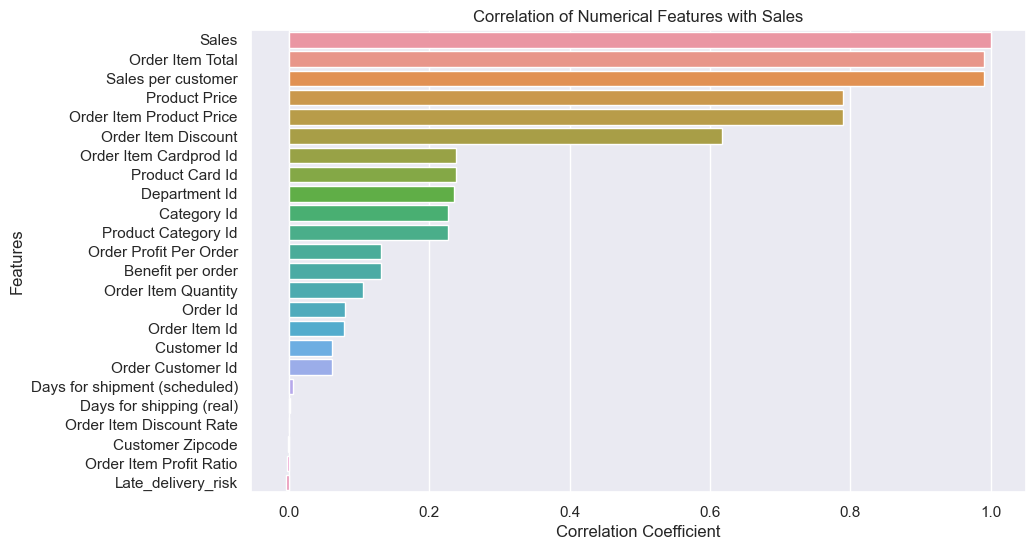

Sales                            1.000000
Order Item Total                 0.989744
Sales per customer               0.989744
Product Price                    0.789948
Order Item Product Price         0.789948
Order Item Discount              0.617438
Order Item Cardprod Id           0.238789
Product Card Id                  0.238789
Department Id                    0.234718
Category Id                      0.227483
Product Category Id              0.227483
Order Profit Per Order           0.131816
Benefit per order                0.131816
Order Item Quantity              0.106442
Order Id                         0.079835
Order Item Id                    0.079002
Customer Id                      0.060961
Order Customer Id                0.060961
Days for shipment (scheduled)    0.006327
Days for shipping (real)         0.001962
Order Item Discount Rate         0.000346
Customer Zipcode                -0.001507
Order Item Profit Ratio         -0.001766
Late_delivery_risk              -0

In [517]:
# Corr matrix (numerical features)
numerical_features = supply_chain_data.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

# Select the 'Sales' column correlations
sales_corr = correlation_matrix['Sales'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_corr.values, y=sales_corr.index)
plt.title('Correlation of Numerical Features with Sales')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
sales_corr

In [518]:
# Select numeric columns
numeric_columns = supply_chain_data.select_dtypes(include=['number'])  

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
threshold = 0.7

# Create a mask to identify highly correlated pairs
mask = (np.abs(correlation_matrix) >= threshold) & (np.abs(correlation_matrix) < 1)

#initialize list
highly_correlated_pairs = []

# Find highly correlated pairs and their correlation values
for col in mask.columns:
    correlated_cols = mask.index[mask[col]]
    correlated_values = correlation_matrix.loc[col, correlated_cols]
    for correlated_col, correlation_value in zip(correlated_cols, correlated_values):
        highly_correlated_pairs.append((col, correlated_col, correlation_value))

# Sort the list by correlation value
highly_correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for pair in highly_correlated_pairs:
    correlation_type = "Positive" if pair[2] > 0 else "Negative"
    print(f"{pair[0]} and {pair[1]} ({correlation_type} Correlation): {pair[2]:.2f}")

Order Id and Order Item Id (Positive Correlation): 1.00
Order Item Id and Order Id (Positive Correlation): 1.00
Category Id and Order Item Cardprod Id (Positive Correlation): 0.99
Category Id and Product Card Id (Positive Correlation): 0.99
Order Item Cardprod Id and Category Id (Positive Correlation): 0.99
Order Item Cardprod Id and Product Category Id (Positive Correlation): 0.99
Product Card Id and Category Id (Positive Correlation): 0.99
Product Card Id and Product Category Id (Positive Correlation): 0.99
Product Category Id and Order Item Cardprod Id (Positive Correlation): 0.99
Product Category Id and Product Card Id (Positive Correlation): 0.99
Sales per customer and Sales (Positive Correlation): 0.99
Sales and Sales per customer (Positive Correlation): 0.99
Sales and Order Item Total (Positive Correlation): 0.99
Order Item Total and Sales (Positive Correlation): 0.99
Department Id and Order Item Cardprod Id (Positive Correlation): 0.91
Department Id and Product Card Id (Positiv

In [519]:
# Dropping highly correlated features
supply_chain_data = supply_chain_data.drop(['Order Item Id', 'Category Id', 'Order Item Cardprod Id', 'Product Card Id', 'Product Category Id', 'Order Item Product Price', 
                                          'Sales per customer', 'Order Item Total', 'Order Item Profit Ratio', 'Product Price'], axis =1).reset_index()

In [520]:
# Convert 'order date (DateOrders)' to datetime format
supply_chain_data['order date (DateOrders)'] = pd.to_datetime(supply_chain_data['order date (DateOrders)'])

# Extract year, month, and day as separate columns
supply_chain_data['Order_Year'] = supply_chain_data['order date (DateOrders)'].dt.year
supply_chain_data['Order_Month'] = supply_chain_data['order date (DateOrders)'].dt.month
supply_chain_data['Order_Day'] = supply_chain_data['order date (DateOrders)'].dt.day

# Drop the original 'order date (DateOrders)' column
supply_chain_data.drop('order date (DateOrders)', axis=1, inplace=True)

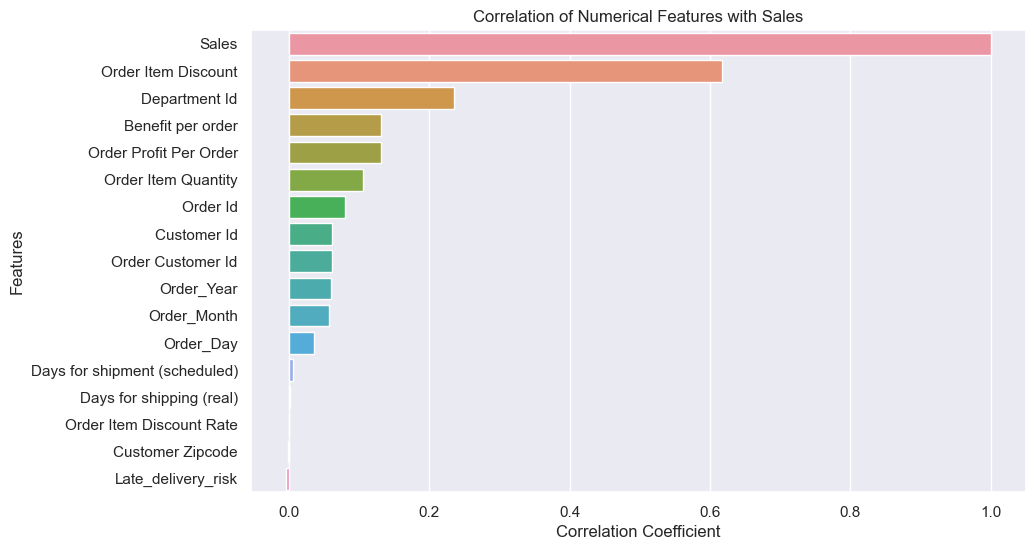

Sales                            1.000000
Order Item Discount              0.617438
Department Id                    0.234718
Benefit per order                0.131816
Order Profit Per Order           0.131816
Order Item Quantity              0.106442
Order Id                         0.079835
Customer Id                      0.060961
Order Customer Id                0.060961
Order_Year                       0.060195
Order_Month                      0.057534
Order_Day                        0.036345
Days for shipment (scheduled)    0.006327
Days for shipping (real)         0.001962
Order Item Discount Rate         0.000346
Customer Zipcode                -0.001507
Late_delivery_risk              -0.003564
Name: Sales, dtype: float64

In [524]:
# Corr matrix (numerical features)
numerical_features = supply_chain_data.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

# Select the 'Sales' column correlations
sales_corr = correlation_matrix['Sales'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_corr.values, y=sales_corr.index)
plt.title('Correlation of Numerical Features with Sales')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
sales_corr

- Order Item Discount: High positive correlation (0.62) - as the discount increases, sales are likely to go up too.
- Department Id: Some positive correlation (0.23) - Interesting. Maybe specific departments sell more?
- Benefit per order / Order Profit Per Order: Positive correlation (0.13) - more profitable orders tend to have higher sales.
- Order Item Quantity: Slightly positive correlation (0.11) - as the quantity of items in an order increases, sales seem to go up.

In [525]:
# Checking the unique values for each categorical column to decide between one-hot and label encoding
categorical_columns = supply_chain_data.select_dtypes(include=['object']).columns

# Count the unique values in each categorical column
unique_counts = {col: supply_chain_data[col].nunique() for col in categorical_columns}
unique_counts

{'Type': 4,
 'Delivery Status': 4,
 'Category Name': 50,
 'Customer City': 563,
 'Customer Country': 2,
 'Customer Segment': 3,
 'Customer State': 46,
 'Department Name': 11,
 'Market': 5,
 'Order City': 3597,
 'Order Country': 164,
 'Order Region': 23,
 'Order State': 1089,
 'Order Status': 9,
 'Product Name': 118,
 'Shipping Mode': 4}

One-hot encoding is preferred when the categorical variables are nominal (i.e., without intrinsic order), and label encoding is used when the categorical variable is ordinal (i.e., with some sort of ranked order. However, in cases where you have a large number of unique values, label encoding can be more practical to reduce dimensionality.

<ins>We are going to do the following:<ins>

Label Encoding: For categories with a large number of unique values, to avoid expanding the feature space excessively. For example, 'Order City', 'Order State', etc.

One-Hot Encoding: For categories with a small number of unique values, where each category could provide important information for the model. For example, 'Type', 'Delivery Status', etc.

In [526]:
# Initialize label encoder
label_encoder = LabelEncoder()

label_encode_cols = ['Order City', 'Order State', 'Customer City', 'Product Name', 'Order Country']
one_hot_encode_cols = ['Type', 'Delivery Status', 'Category Name', 'Customer Country', 
                       'Customer Segment', 'Customer State', 'Department Name', 
                       'Market', 'Order Region', 'Order Status', 'Shipping Mode']

# Perform label encoding
for col in label_encode_cols:
    supply_chain_data[col] = label_encoder.fit_transform(supply_chain_data[col])

# Perform one-hot encoding and drop original columns
supply_chain_data = pd.get_dummies(supply_chain_data, columns=one_hot_encode_cols, drop_first=True)

# Display df
supply_chain_data.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Customer City,Customer Id,Customer Zipcode,Department Id,Order City,Order Country,...,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,0,66,20755,725.0,2,331,70,...,True,False,False,False,False,False,False,False,False,True
1,5,4,-249.089996,1,66,19492,725.0,2,391,69,...,False,False,False,True,False,False,False,False,False,True
2,4,4,-247.779999,0,452,19491,95125.0,2,391,69,...,False,False,False,False,False,False,False,False,False,True
3,3,4,22.860001,0,285,19490,90027.0,2,3226,8,...,True,False,False,False,False,False,False,False,False,True
4,2,4,134.210007,0,66,19489,725.0,2,3226,8,...,False,False,False,False,True,False,False,False,False,True


In [527]:
# Prepare the features and target variable
X = supply_chain_data.drop(columns=['Sales'])  # Drop the target column to prepare features
y = supply_chain_data['Sales']  # Target variable

# Initialize and fit the RF Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Make a df out of it
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort and display the df
features_df_sorted = features_df.sort_values(by='Importance', ascending=False)
features_df_sorted.head(20) 

,Feature,Importance
17,Product Name,0.305194
14,Order Item Quantity,0.146736
133,Department Name_Technology,0.106535
39,Category Name_Computers,0.083237
36,Category Name_Cardio Equipment,0.072524
44,Category Name_Fishing,0.049315
12,Order Item Discount,0.036869
2,Benefit per order,0.036154
15,Order Profit Per Order,0.034519
35,Category Name_Camping & Hiking,0.028151


Interesting. To address the number of features, the threshold is going to bet at 0.0001

In [528]:
threshold = 0.0001

# Filter the features that have importance greater than the threshold
selected_features = features_df_sorted[features_df_sorted['Importance'] > threshold]
num_selected_features = selected_features.shape[0]

# Get the name of features
selected_feature_names = selected_features['Feature'].tolist()
num_selected_features, selected_feature_names[:] 

(49,
 ['Product Name',
  'Order Item Quantity',
  'Department Name_Technology',
  'Category Name_Computers',
  'Category Name_Cardio Equipment',
  'Category Name_Fishing',
  'Order Item Discount',
  'Benefit per order',
  'Order Profit Per Order',
  'Category Name_Camping & Hiking',
  'Category Name_Water Sports',
  'Order Id',
  "Category Name_Children's Clothing",
  'Category Name_Cleats',
  'Department Id',
  "Category Name_Men's Footwear",
  'Category Name_Garden',
  'Order Item Discount Rate',
  'Department Name_Outdoors',
  'Category Name_Crafts',
  'Category Name_Strength Training',
  'Category Name_Hockey',
  'Department Name_Footwear',
  'Order Customer Id',
  'Customer Id',
  'Category Name_Music',
  'Category Name_Sporting Goods',
  "Category Name_Women's Clothing",
  'Category Name_Cameras ',
  "Category Name_Kids' Golf Clubs",
  "Category Name_Girls' Apparel",
  'Category Name_Basketball',
  'Category Name_Lacrosse',
  'Order_Month',
  'Department Name_Fitness',
  'Categor

That's a big step. Going from 172 to only 49 features is quite nice. 
However, we still need a bit more features to be eliminated.

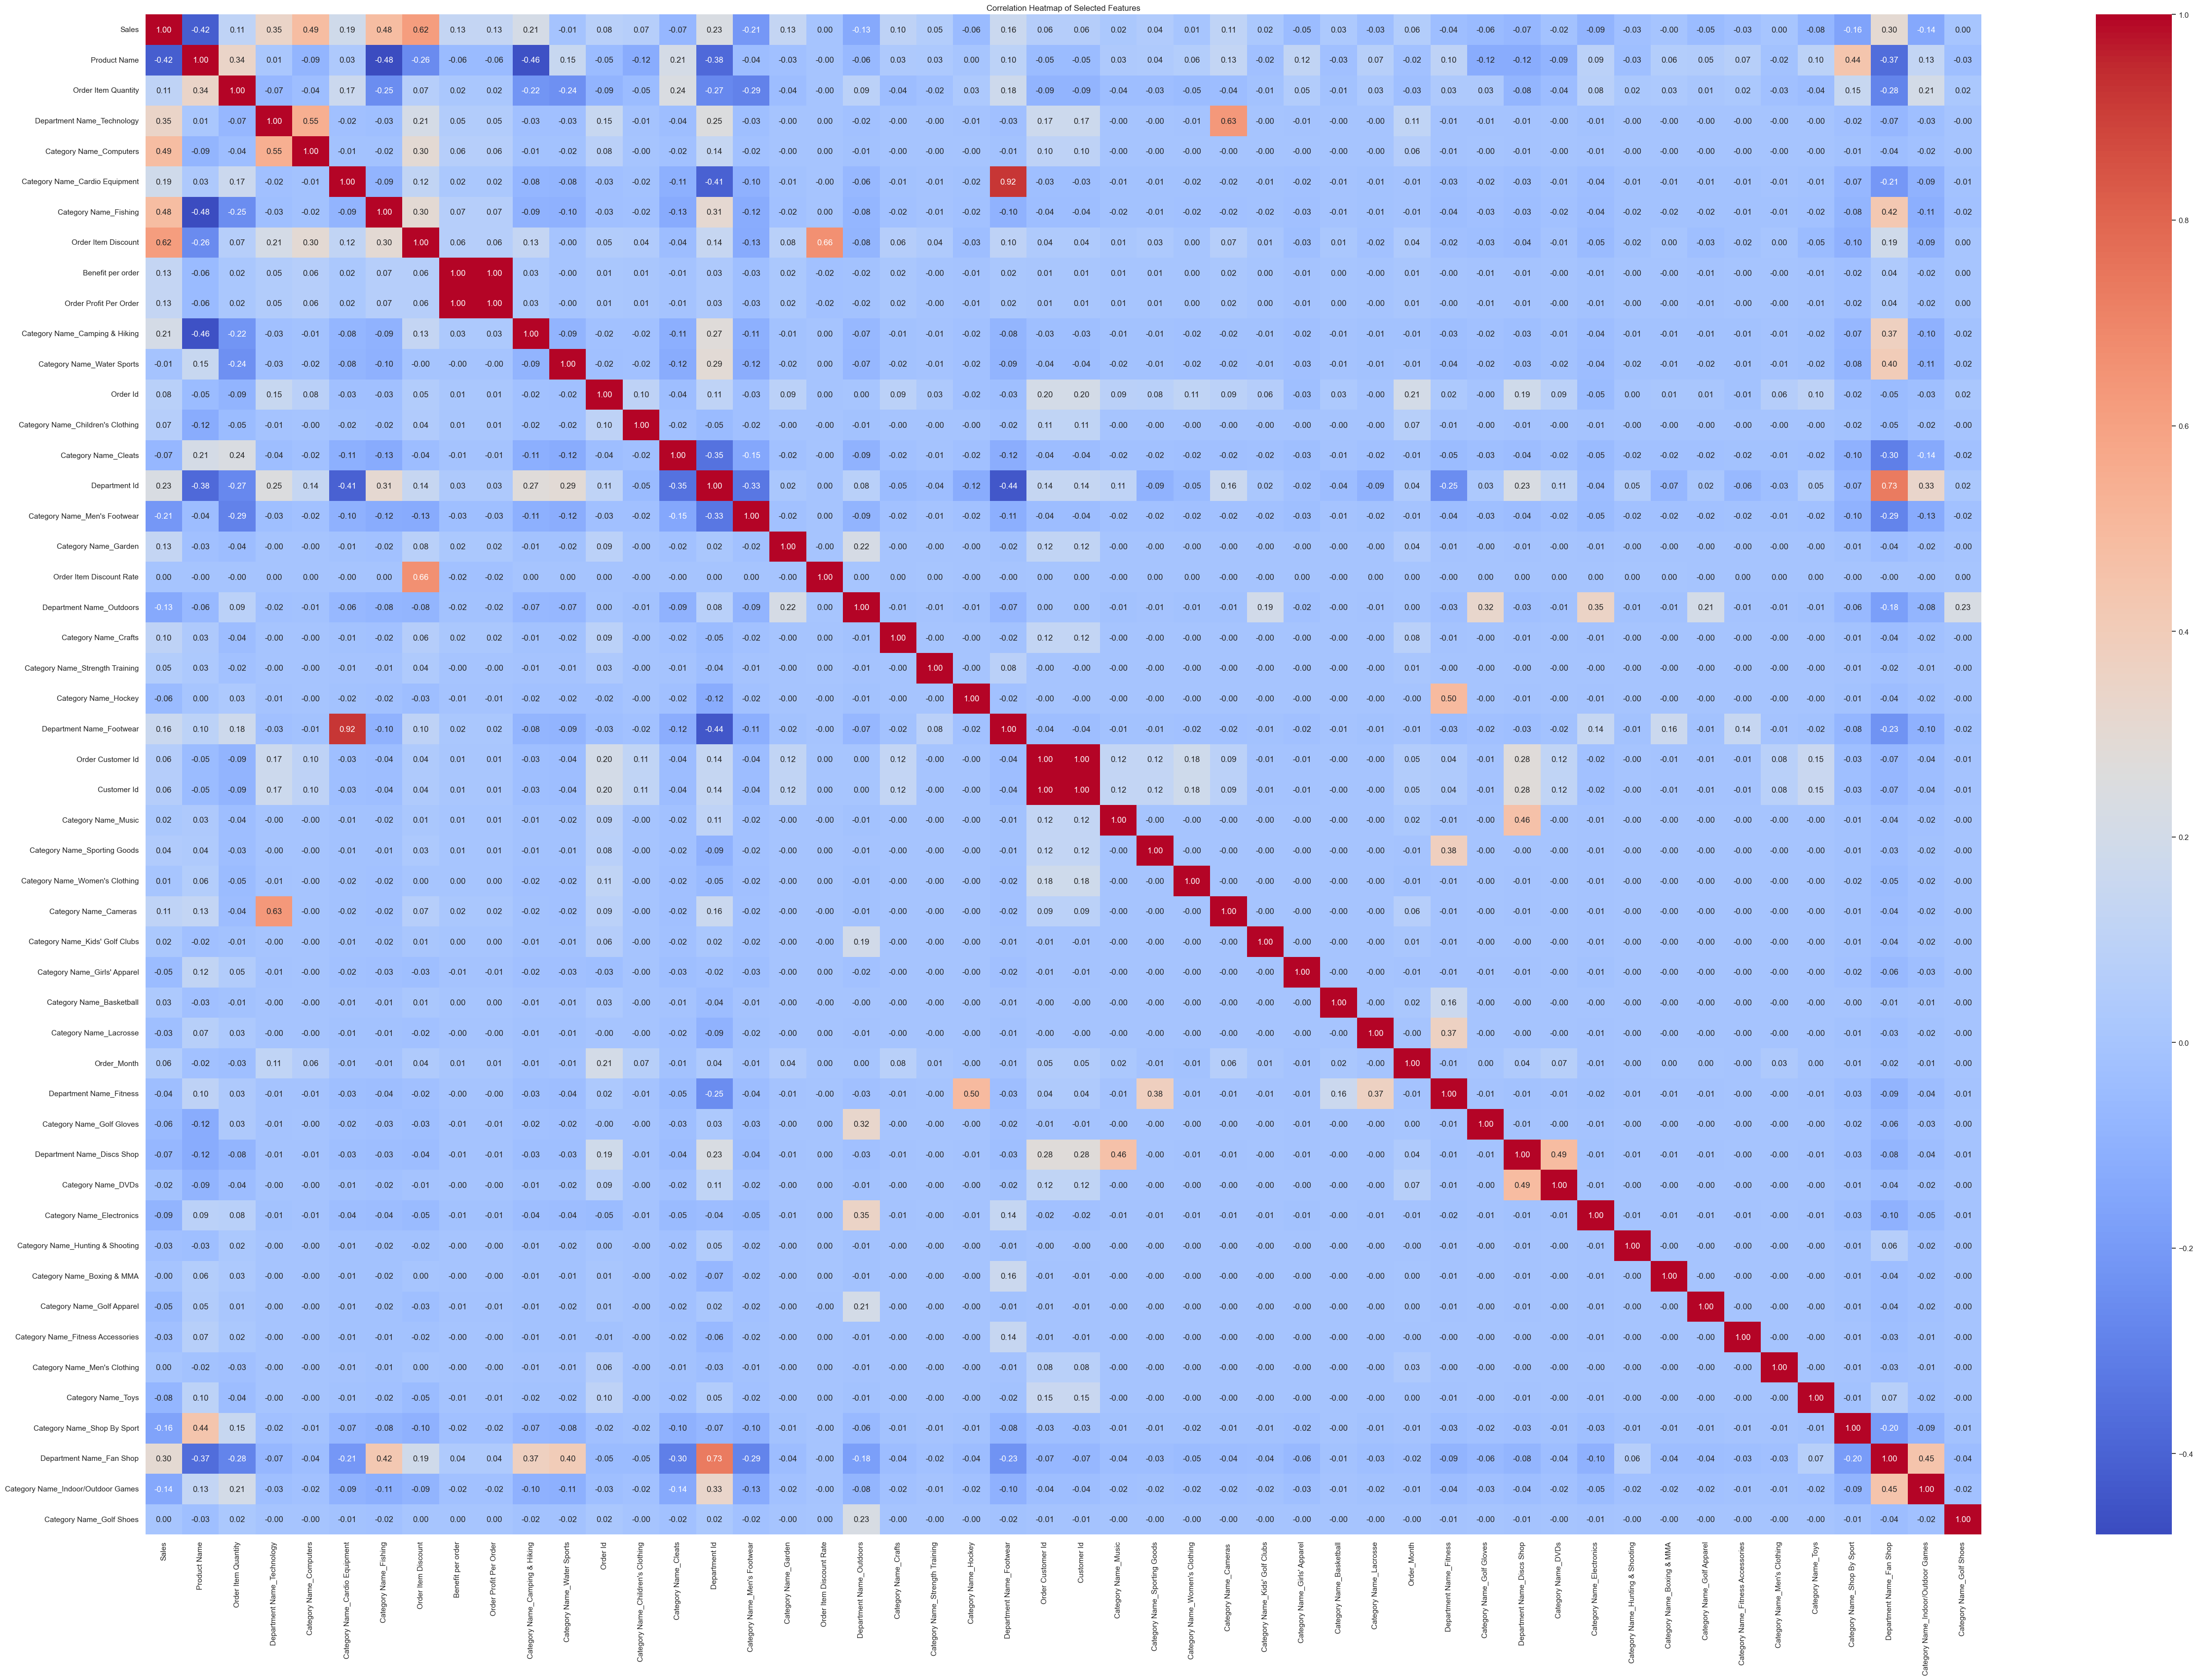

In [533]:
# Filter the dataframe to include only the selected 49 features plus the target variable 'Sales'
filtered_df = supply_chain_data[['Sales'] + selected_feature_names]

# Calculate the correlation matrix
corr_matrix = filtered_df.corr()

# Create a heatmap
plt.figure(figsize=(60, 40))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [532]:
# Heatmap, as expected, is not very informative. Let's try something else.
# Create a DataFrame to hold the highly correlated pairs
# Initialize an empty set
correlated_features = set()

# Loop through columns, with a threshold set to 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Print out correlated features
print(correlated_features)

{'Customer Id', 'Department Name_Footwear', 'Order Profit Per Order'}
